In [1]:
# Start rmagic to mix Python and R code sells
#this allows both python and R to be used
%load_ext rpy2.ipython

In [3]:
#lets import pandas as well as read the data from github and call it nutritionDF
import pandas as pd

nutritionDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv");

nutritionDF #display the data


,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [5]:
# 3. Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat.
# Comment on the validity of comparing food items of different sizes.
#help I used https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
nutritionDF['saturated_fat'].nlargest(n=5)
#Id  say the validity is true because the satureated fat is higher in these foods like Fruitcake, Ice cream, and Cake

378    119.9
535    118.3
458     92.0
581     90.1
890     80.4
Name: saturated_fat, dtype: float64

In [21]:
 #Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams.
# Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram.
 #Which food has the most saturated fat per gram?
nutritionDF["saturated_fat_per_gram"] = nutritionDF["saturated_fat"] / nutritionDF["weight_in_grams"]
nutritionDF

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,0.000000
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,0.000000
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,0.000000
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,0.000000


In [22]:
#a listing of the five food  items highest in saturated fat per gram
nutritionDF['saturated_fat_per_gram'].nlargest(n=5)

908    0.507143
909    0.507143
709    0.505310
710    0.505310
912    0.500000
Name: saturated_fat_per_gram, dtype: float64

In [27]:
#here i renamed "food type" to "foodItem" because I was having problems
nutritionDF = nutritionDF.rename(columns={'food item': 'foodItem'})

In [29]:
#Which food has the most saturated fat per gram? This would be Butter: Salted 1 TBSP
nutritionDF.nlargest(n=5, columns=['saturated_fat_per_gram'])


,foodItem,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
912,BUTTER; SALTED 1 PAT,5.0,2.5,11,0.500000


In [32]:
#Standardize (zero mean) the field saturated_ fat_ per_gram,
# and produce a listing of all the food items that are outliers at the high end of the scale.
#How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram
normalized_df=(nutritionDF['saturated_fat_per_gram']-nutritionDF['saturated_fat_per_gram'].min())/(nutritionDF['saturated_fat_per_gram'].max()-nutritionDF['saturated_fat_per_gram'].min())
normalized_df

0      0.000000
1      0.055642
2      0.000000
3      0.375587
4      0.376620
         ...   
956    0.000000
957    0.000000
958    0.000000
959    0.000000
960    0.000000
Name: saturated_fat_per_gram, Length: 961, dtype: float64

In [ ]:
#What I want to do is add a column that just has the zero mean of saturated_fat_per_gram with its values
nutritionDF["zero_mean_satFat"] = normalized_df
nutritionDF

In [48]:
#So we know that if the z core is over 3 or under -3 it is an outlier. So lets check our new column
nutritionDF[nutritionDF.zero_mean_satFat > 3 ]

,foodItem,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,zero_mean_satFat


In [50]:
nutritionDF[nutritionDF.zero_mean_satFat < -3 ]

,foodItem,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,zero_mean_satFat


From the two columns above their ndoes not seems to be any outliers because the z score is not above 3 or below -3.

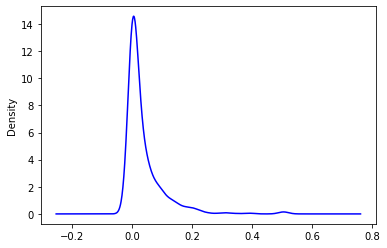

In [54]:
#Create a density plot for saturated_fat_per_gram
#using plot.density()
#I used this from the internet https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/
nutritionDF.saturated_fat_per_gram.plot.density(color='blue')


In [57]:
#checking if there are any missing values
nutritionDF.isnull().values.any()

False

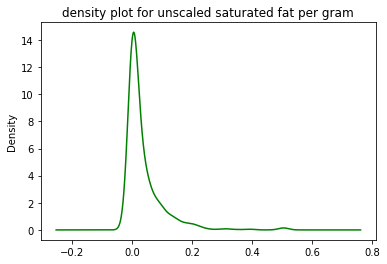

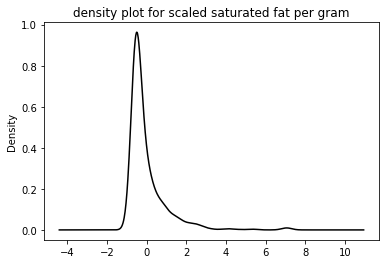

In [63]:
from scipy import stats
import matplotlib.pyplot as plt


nutritionDF['Scaled_saturatedfatpergram'] = stats.zscore(nutritionDF.saturated_fat_per_gram, nan_policy='omit')


nutritionDF.saturated_fat_per_gram.plot.density(color="green")
plt.title('density plot for unscaled saturated fat per gram')
plt.show()


nutritionDF.Scaled_saturatedfatpergram.plot.density(color="black")
plt.title('density plot for scaled saturated fat per gram')
plt.show()
#from the slides showing density plots from unscaled and scaled saturated fat per gram
#taken from the slides